<a href="https://colab.research.google.com/github/wmg0034/Studies/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Generate a binary classification data set in two variables, x and y. Make x continuous and y binary with some noise. Plot them in a scatter plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate data
X,y = make_classification(n_samples=100)




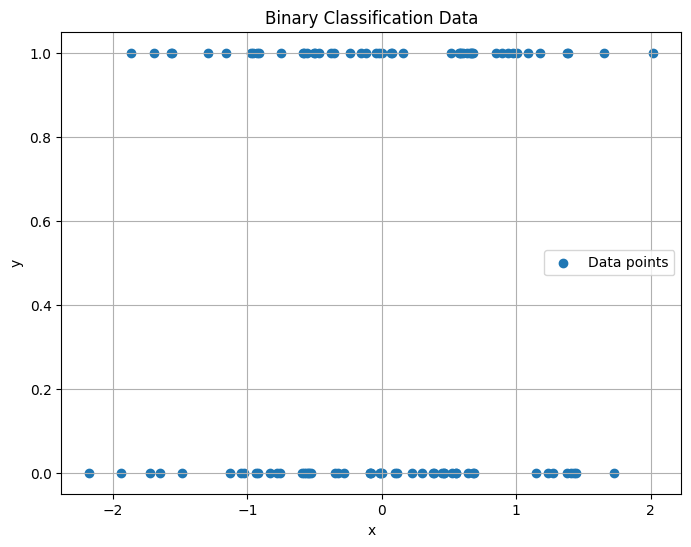

In [ ]:
# Plot the data
plt.figure(figsize=(8, 6))

plt.scatter(X.T[0], y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary Classification Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([51, 49]))

In [ ]:
def log_loss(p, y):
  loss = -1 * ( np.dot(y, np.log(p + EPSILON)) + np.dot( np.ones(len(y)) - y , np.log( np.ones(len(p)) - p + EPSILON ) ) ) / len(y)
  return loss

In [ ]:
EPSILON       = 10 ** -9

def log_reg(X,y):

  learning_rate = 10 ** -3
  threshold     = 0.0001
  converged     = False

  m = np.zeros(len(X.T))
  b = np.zeros(len(X))

  p     = 1 / (1 + np.exp( -1 * (np.dot(X, m) + b)) )
  loss  = log_loss(p,y)

  while not converged:
    error = y - p

    dLdm = -1 * np.dot(error, X)
    dLdb = -1 * sum(error)

    m = m - learning_rate * dLdm
    b = b - learning_rate * dLdb

    p = 1 / (1 + np.exp( -1 * (np.dot(X, m) + b)) )

    old_loss = loss
    loss = log_loss(p,y)
    print("Loss:", loss)

    if abs(loss - old_loss) < threshold:
      converged = True

  return p

In [ ]:
probs = log_reg(X,y)

Loss: 0.6578679559186874
Loss: 0.6260510000920996
Loss: 0.5973210426441061
Loss: 0.571330907321312
Loss: 0.5477657677817604
Loss: 0.5263442757441935
Loss: 0.5068175833998437
Loss: 0.48896711802498855
Loss: 0.47260174041339215
Loss: 0.4575547089551915
Loss: 0.44368070705642987
Loss: 0.4308530757048919
Loss: 0.41896131704577855
Loss: 0.40790888819574717
Loss: 0.3976112778249739
Loss: 0.3879943441689757
Loss: 0.378992887136472
Loss: 0.37054942577882527
Loss: 0.36261315350030526
Loss: 0.35513904574236455
Loss: 0.3480870977170034
Loss: 0.34142167266985746
Loss: 0.3351109438992188
Loss: 0.32912641623863303
Loss: 0.32344251489248843
Loss: 0.3180362313983684
Loss: 0.3128868180981791
Loss: 0.30797552386180327
Loss: 0.3032853649540179
Loss: 0.29880092589831847
Loss: 0.2945081859981002
Loss: 0.2903943678510462
Loss: 0.28644780475789866
Loss: 0.2826578244001863
Loss: 0.2790146465582523
Loss: 0.275509292973881
Loss: 0.27213350774162964
Loss: 0.2688796868485225
Loss: 0.2657408156804009
Loss: 0.26271

In [ ]:
def AUC(probs, y):
  auc_fpr = []
  auc_tpr = []

  thresh_jumps = np.arange(0,1,0.05)
  for threshold in thresh_jumps:
    preds = np.zeros(len(probs))
    for i, p in enumerate(probs):
      if p > threshold:
        preds[i] = 1

    auc_tpr.append( ((preds + y) == 2).sum() / len(y) )
    auc_fpr.append( ((preds - y) == 1).sum() / len(y) )

  plt.scatter(x=auc_fpr, y = auc_tpr)
  plt.show()

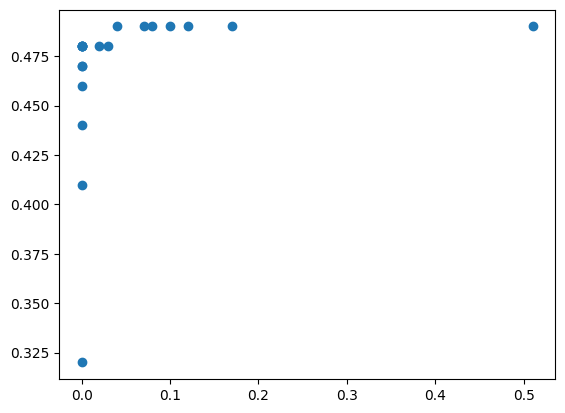

In [ ]:
  AUC(probs, y)

In [ ]:
preds = np.zeros(len(probs))
for i, p in enumerate(probs):
  if p > 0.5:
    preds[i] = 1

preds - y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
# prompt: Implement logistic regression as a class using only numpy

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.001, threshold=0.0001):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, p, y):
        epsilon = 1e-9  # Avoid log(0)
        loss = -1 * (np.dot(y, np.log(p + epsilon)) +
                     np.dot(1 - y, np.log(1 - p + epsilon))) / len(y)
        return loss

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        converged = False

        p = self.sigmoid(np.dot(X, self.weights) + self.bias)
        loss = self.log_loss(p, y)

        while not converged:
            error = y - p

            dLdw = -1 * np.dot(X.T, error)
            dLdb = -1 * np.sum(error)

            self.weights -= self.learning_rate * dLdw
            self.bias -= self.learning_rate * dLdb

            p = self.sigmoid(np.dot(X, self.weights) + self.bias)
            new_loss = self.log_loss(p, y)
            #print("Loss:", new_loss) # Optional: Print loss at each iteration

            if abs(new_loss - loss) < self.threshold:
                converged = True
            loss = new_loss
        return self

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        predictions = np.where(probabilities > threshold, 1, 0)
        return predictions
